In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 
import numpy as np
import pandas as pd
import matplotlib as plt
import nltk
import re
import csv
import pandas as pd
# lemma = nltk.wordnet.WordNetLemmatizer()
sno = nltk.stem.SnowballStemmer('english')
# from nltk.tokenize import sent_tokenize, word_tokenize
#ps = PorterStemmer()
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [33]:
data = pd.read_csv("D:\\Data Programming\\food_coded.csv")
features = data.columns
dictionary = {}

for feature in features:
    
    column = data[feature]
    
    has_null = any(column.isnull())
    
    if(has_null):
        
        null_count = column.isnull().value_counts()[True]
        not_null_count = column.notnull().value_counts()[True]
        total_rows = len(column)
        
        row = {}
        row["Null Count"] = null_count
        row["Not Null Count"] = not_null_count
        row["Null Count / Total Rows"] = "%s / %s" %  (null_count, total_rows)
        row["Percentage of Nulls"] = "%.2f" % ((null_count / total_rows) * 100) + "%"
        row["Ratio (Not Null : Null)"] = "%.2f : 1" %  ((null_count / not_null_count))
        
        dictionary[feature] = row

ordered_columns = ["Null Count", "Not Null Count", "Ratio (Not Null : Null)", "Null Count / Total Rows", "Percentage of Nulls"]

from pandas import DataFrame

new_dataframe = DataFrame.from_dict(data = dictionary, orient="index")
new_dataframe[ordered_columns].sort_values("Null Count", ascending=False)

,Null Count,Not Null Count,Ratio (Not Null : Null),Null Count / Total Rows,Percentage of Nulls
type_sports,22,106,0.21 : 1,22 / 128,17.19%
calories_day,20,108,0.19 : 1,20 / 128,15.62%
cuisine,18,110,0.16 : 1,18 / 128,14.06%
exercise,13,115,0.11 : 1,13 / 128,10.16%
employment,9,119,0.08 : 1,9 / 128,7.03%
comfort_food_reasons,5,123,0.04 : 1,5 / 128,3.91%
cook,4,124,0.03 : 1,4 / 128,3.12%
father_profession,4,124,0.03 : 1,4 / 128,3.12%
mother_education,3,125,0.02 : 1,3 / 128,2.34%
eating_changes,3,125,0.02 : 1,3 / 128,2.34%


In [77]:
cols = ['comfort_food','comfort_food_reasons','eating_changes', 'diet_current']
data[cols] = data[cols].replace(np.nan, 'Unknown', regex=True)
data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [78]:
#create a list of all the comfort foods
comfort_food = []
for line in data['comfort_food']:
    #x=[x for x in word_tokenize(line[7].lower().strip())]
    x=[x for x in re.split(',', line.lower().strip())] # To split words by delimeter comma
    for i in range(len(x)):
        comfort_food.append(x[i].strip())
comfortFood = []
for i in comfort_food:
    comfortFood.append(sno.stem(i)) # Stemming
print(comfortFood)

['none', 'chocol', 'chip', 'ice cream', 'frozen yogurt', 'pizza', 'fast food', 'pizza', 'mac and chees', 'ice cream', 'ice cream', 'chocol', 'chip', 'candi', 'brownies and soda.', 'chocol', 'ice cream', 'french fri', 'pretzel', 'ice cream', 'cheeseburg', 'chips.', 'donut', 'ice cream', 'chip', 'mac and chees', 'chocol', 'and pasta', 'pasta', 'grandma homemade chocolate cake anything homemad', 'chocol', 'pasta', 'soup', 'chip', 'popcorn', 'cooki', 'popcorn', 'and chip', 'ice cream', 'cake', 'chocol', 'pizza', 'fruit', 'spaghetti', 'chicken and potato', 'cooki', 'donut', 'candy bar', 'saltfish', 'candy and kit kat', 'chip', 'cooki', 'ice cream', 'chocol', 'ice crea', 'pizza', 'wing', 'chines', 'fast food', 'pizza', 'sub', 'chocol', 'sweet', 'ice cream', 'burger', 'chip', 'cooki', 'chilli', 'soup', 'pot pi', 'soup', 'pasta', 'browni', 'cake', 'chocol', 'ice cream/milkshak', 'cooki', 'chip', 'ice cream', 'microwaveable food', 'chicken fing', 'pizza', 'cooki', 'hot chocol', 'beef jerki', 't

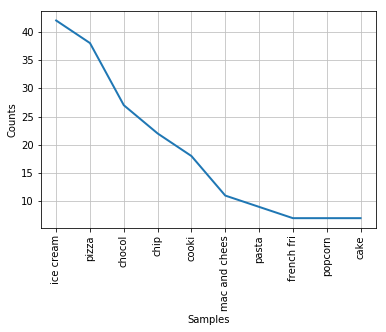

In [79]:
#most common types of comfort food
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
new = [i for i in comfortFood if i not in stop]
Freq_dist_nltk=nltk.FreqDist(new)
Freq_dist_nltk.plot(10, cumulative = False)

In [75]:
#Let's look at main reasons for eating comfort food
comfort_food_reason=[]
for line in data['comfort_food_reasons']:
    #x=[x for x in word_tokenize(line[8].lower().strip())]
    x = [x for x in re.findall(r"[\w']+", line.lower().strip())]
    for i in range(len(x)):
        comfort_food_reason.append(x[i].strip())

comfortFoodReasons =[]
for i in comfort_food_reason:
    comfortFoodReasons.append(sno.stem(i))
print(comfortFoodReasons)

['we', 'dont', 'have', 'comfort', 'stress', 'bore', 'anger', 'stress', 'sad', 'boredom', 'stress', 'boredom', 'crave', 'none', 'i', "don't", 'eat', 'comfort', 'food', 'i', 'just', 'eat', 'when', "i'm", 'hungri', 'stress', 'boredom', 'i', 'eat', 'comfort', 'food', 'when', 'im', 'stress', 'out', 'from', 'school', 'final', 'week', 'when', 'i', 'm', 'sad', 'or', 'when', 'i', 'am', 'deal', 'with', 'person', 'famili', 'issu', 'boredom', 'stress', 'anger', 'and', 'sad', 'boredom', 'unknown', 'sad', 'boredom', 'late', 'night', 'snack', 'stress', 'boredom', 'special', 'occas', 'friend', 'environ', 'and', 'boredom', 'boredom', 'stress', 'i', 'usual', 'onli', 'eat', 'comfort', 'food', 'when', "i'm", 'bore', 'if', 'i', 'am', 'do', 'someth', 'i', 'can', 'go', 'for', 'hour', 'without', 'eat', 'sad', 'stress', 'boredom', 'sad', 'hungri', 'happi', 'satisfact', 'most', 'boredom', 'sad', 'depress', 'stress', 'and', 'boredom', 'a', 'long', 'day', 'not', 'feel', 'well', 'winter', 'boredom', 'boredom', 'la

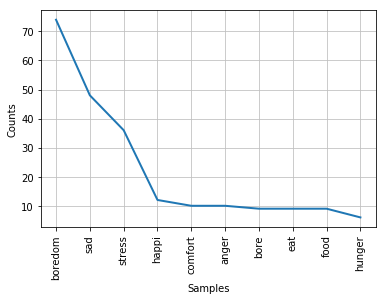

In [76]:
#most common reasons for eating comfort food
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
#[print(i) for i in stop]
new = [i for i in comfortFoodReasons if i not in stop]
Freq_dist_nltk=nltk.FreqDist(new)
Freq_dist_nltk.plot(10, cumulative = False)


In [70]:
#Let's look at their current diet
current_diet_coded=[]
for line in data['diet_current_coded']:
    current_diet_coded.append(line)
print(current_diet_coded)


[1, 2, 3, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 4, 2, 2, 1, 1, 2, 2, 2, 2, 1, 4, 3, 4, 1, 2, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 4, 1, 2, 2, 3, 2, 2, 2, 4, 2, 1, 3, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1]


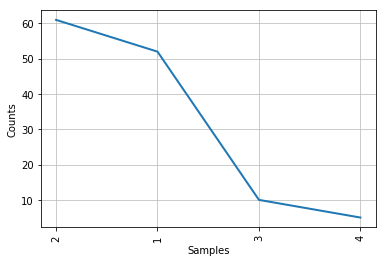

In [81]:
#and the current diet is...
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

knew = [j for j in current_diet_coded if j not in stop]
Freq_dist_nltk1=nltk.FreqDist(knew)
Freq_dist_nltk1.plot(10, cumulative = False)

# 1 – healthy/balanced/moderated/
# 2 – unhealthy/cheap/too much/random/
# 3 – the same thing over and over
# 4 – unclear

In [68]:
#Let's look at eating changes since they have become students
eating_changes_coded=[]
eating_changes_coded1 =[]

for line in data['eating_changes_coded']:
    eating_changes_coded.append(line)
for line in data['eating_changes_coded1']:
    eating_changes_coded1.append(line)    


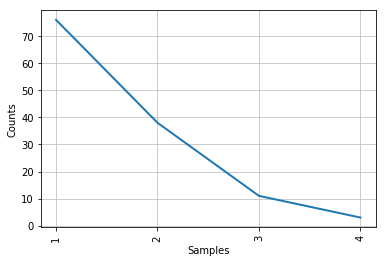

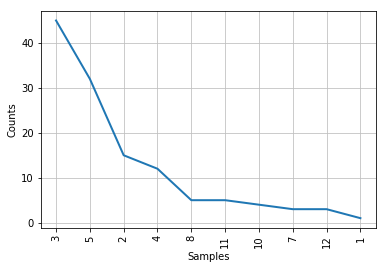

In [82]:
#eating changes since they became students
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

knew = [i for i in eating_changes_coded if i not in stop]
Freq_dist_nltk1=nltk.FreqDist(knew)
Freq_dist_nltk1.plot(10, cumulative = False)

# 1 – worse
# 2 – better
# 3 – the same
# 4 – unclear

kknew = [i for i in eating_changes_coded1 if i not in stop]
Freq_dist_nltk2=nltk.FreqDist(kknew)
Freq_dist_nltk2.plot(10, cumulative = False)

# 1 – eat faster
# 2 – bigger quantity
# 3 – worse quality 
# 4 – same food
# 5 – healthier
# 6 – unclear
# 7 – drink coffee 
# 8 – less food
# 9 – more sweets
# 10 – timing 
# 11 – more carbs or snacking
# 12 – drink more water
# 13 – more variety
